# Dependency Inversion Principle
Las clases de alto nivel no deben depender de las clases de bajo nivel. Ambas deben depender de abstracciones. Además, las abstracciones no deben depender de los detalles. Los detalles deben depender de las abstracciones.

En este ejemplo, la clase de alto nivel (que se ocupa de informes presupuestarios) utiliza una clase de base de datos de bajo nivel para leer y almacenar su información. Esto significa que cualquier cambio en la clase de bajo nivel, como en el caso del lanzamiento de una nueva versión del servidor de la base de datos, puede afectar a la clase de alto nivel, que no tiene por qué conocer los detalles de almacenamiento de datos.

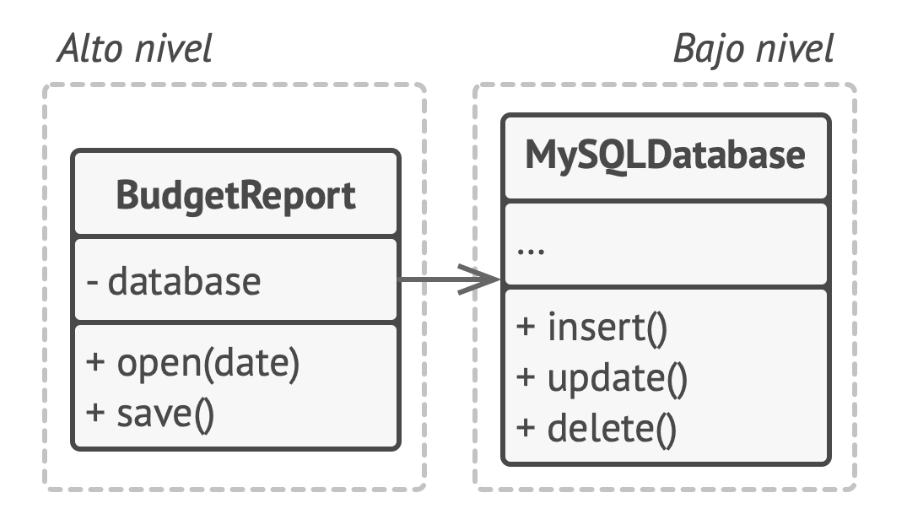

**Antes:** La clase `BudgetReport` depende directamente de la clase `Database`. Si la clase `Database` cambia, la clase `BudgetReport` también debe cambiar.

In [1]:
# Bajo nivel
class MySQLDatabase:
    def __init__(self):
        self.__connection = None

    def insert(self, query):
        print(f"Inserting {query}")

    def update(self, query):
        print(f"Updating {query}")

    def delete(self, query):
        print(f"Deleting {query}")


# Alto nivel
class BudgetReport:
    def __init__(self):
        self.__database = MySQLDatabase()

    def open(self):
        self.__database.insert("Open report")

    def save(self):
        self.__database.update("Save report")

Puedes arreglar este problema creando una interfaz de alto nivel que describa operaciones de leer/escribir y haciendo que la clase de informes utilice esa interfaz en lugar de la clase de bajo nivel. Después puedes cambiar o extender la clase de bajo nivel original para implementar la nueva interfaz de leer/escribir declarada por la lógica de negocio.

Aquí se aplica igualmente el patrón de diseño Strategy, que permite crear distintas conexiones a la base de datos sin que la clase `BudgetReport` tenga que cambiar.

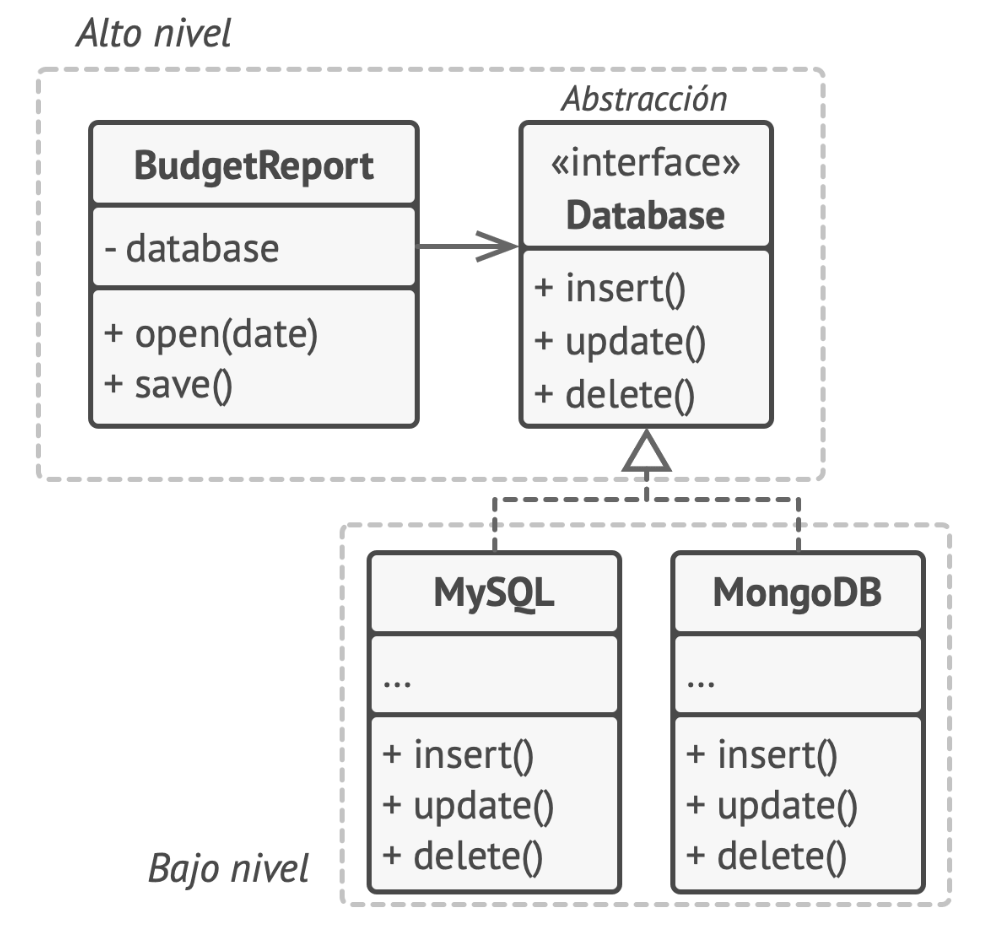

**Después:** Las clases de bajo nivel dependen de una abstracción de alto nivel. La clase `BudgetReport` depende de la interfaz `DatabaseInterface`, que puede ser implementada por cualquier clase de base de datos.

In [2]:
from abc import ABC, abstractmethod


class Database(ABC):
    @abstractmethod
    def insert(self, query):
        raise NotImplementedError

    @abstractmethod
    def update(self, query):
        raise NotImplementedError

    @abstractmethod
    def delete(self, query):
        raise NotImplementedError

In [5]:
class MySQL(Database):
    def insert(self, query):
        print(f"Inserting {query} in MySQL")

    def update(self, query):
        print(f"Updating {query} in MySQL")

    def delete(self, query):
        print(f"Deleting {query} in MySQL")


class MongoDB(Database):
    def insert(self, query):
        print(f"Inserting {query} in MongoDB")

    def update(self, query):
        print(f"Updating {query} in MongoDB")

    def delete(self, query):
        print(f"Deleting {query} in MongoDB")


class BudgetReport:
    def __init__(self, database: Database):
        self.__database = database

    def open(self):
        self.__database.insert("Open report")

    def save(self):
        self.__database.update("Save report")

In [6]:
budget = BudgetReport(MySQL())
budget.open()

Inserting Open report in MySQL


In [7]:
budget2 = BudgetReport(MongoDB())
budget2.open()

Inserting Open report in MongoDB


Como resultado, la dirección de la dependencia original se ha invertido: las clases de bajo nivel dependen ahora de abstracciones de alto nivel.